In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

Solo Exploration and Presentation:  Relationship, if any, between global GDP and Infant Mortality Rates, 1990 - 2015

Overview 
2 reports (UN GDP per Capita, UN Infant Mortality Rates)
Challenges:  
    Infant Mortality report in 5-year increments (e.g., "2000-2005"), GDP annually
    GDP Report short timeframe (1990-2015)
Summary:  While on paper there may be some correlation between increased GDP and decreased Infant Mortality rates, I believe the Infant Mortality Rate would have declined anyway due to other factors such as enhancements to healthcare at the local level as well as better access to information, globally

In [2]:
gdp = pd.read_csv('../data/gdp_per_capita.csv')
gdp.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [3]:
infant_mortality = pd.read_csv('../data/UNdata_infant_mortality_rates.csv').sort_values('Year(s)', ascending=True)
infant_mortality.head()                               

,Country or Area,Year(s),Variant,Value
8669,Zimbabwe,1950-1955,Medium,113.742
389,Asia,1950-1955,Medium,154.527
1739,Cook Islands,1950-1955,Medium,NaN
2399,Eritrea,1950-1955,Medium,199.329
1949,Czechia,1950-1955,Medium,42.181


In [4]:
#Remove Variant column from Infant Mortality dbase because means nothing 
infant_mortality=infant_mortality.drop(columns='Variant')
infant_mortality.head()

,Country or Area,Year(s),Value
8669,Zimbabwe,1950-1955,113.742
389,Asia,1950-1955,154.527
1739,Cook Islands,1950-1955,NaN
2399,Eritrea,1950-1955,199.329
1949,Czechia,1950-1955,42.181


In [5]:
#Drop the first half of the "Year" column in infant_mortality
new = infant_mortality['Year(s)'].str.split("-", n = 1, expand = True)
new.head()

,0,1
8669,1950,1955
389,1950,1955
1739,1950,1955
2399,1950,1955
1949,1950,1955


In [6]:
#make separate first year block column from new df
infant_mortality['discardYear']= new[0]

In [7]:
#make separate last year block column from new df
infant_mortality['Year']= new[1]

In [8]:
#Drop original infant_mortality 'Year(s)' and the newly created 'discardYear' columns
infant_mortality.drop(columns=['Year(s)','discardYear'])

,Country or Area,Value,Year
8669,Zimbabwe,113.742,1955
389,Asia,154.527,1955
1739,Cook Islands,NaN,1955
2399,Eritrea,199.329,1955
1949,Czechia,42.181,1955
...,...,...,...
450,Austria,0.670,2100
6240,Republic of Korea,0.598,2100
2580,Falkland Islands (Malvinas),NaN,2100
2550,Europe and Northern America,0.987,2100


In [9]:
infant_mortality.rename(columns={'Country or Area':'Country','Value':'Infant Mortality Rate'}, inplace=True)
infant_mortality

,Country,Year(s),Infant Mortality Rate,discardYear,Year
8669,Zimbabwe,1950-1955,113.742,1950,1955
389,Asia,1950-1955,154.527,1950,1955
1739,Cook Islands,1950-1955,NaN,1950,1955
2399,Eritrea,1950-1955,199.329,1950,1955
1949,Czechia,1950-1955,42.181,1950,1955
...,...,...,...,...,...
450,Austria,2095-2100,0.670,2095,2100
6240,Republic of Korea,2095-2100,0.598,2095,2100
2580,Falkland Islands (Malvinas),2095-2100,NaN,2095,2100
2550,Europe and Northern America,2095-2100,0.987,2095,2100


In [10]:
gdp=gdp.drop(columns='Value Footnotes')
gdp.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [11]:
gdp.rename(columns={'Value':'GDP Rate','Country or Area':'Country'}, inplace=True)
gdp

,Country,Year,GDP Rate
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
...,...,...,...
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849
6728,Zimbabwe,1990,2819.549467
6729,footnoteSeqID,Footnote,NaN


In [12]:
# Note that the 'Year(s)' and 'discardYear' are back in the report.
gdp_infant_mortality = gdp.merge(infant_mortality, on=['Country', 'Year'])
gdp_infant_mortality

,Country,Year,GDP Rate,Year(s),Infant Mortality Rate,discardYear
0,Afghanistan,2015,1766.593077,2010-2015,60.100,2010
1,Afghanistan,2010,1671.581238,2005-2010,72.193,2005
2,Afghanistan,2005,1099.104568,2000-2005,84.647,2000
3,Albania,2015,10970.321401,2010-2015,9.212,2010
4,Albania,2010,9927.638204,2005-2010,16.781,2005
...,...,...,...,...,...,...
972,Zimbabwe,2010,1928.017081,2005-2010,62.686,2005
973,Zimbabwe,2005,1974.645081,2000-2005,65.008,2000
974,Zimbabwe,2000,2945.993212,1995-2000,68.980,1995
975,Zimbabwe,1995,2736.486436,1990-1995,61.844,1990


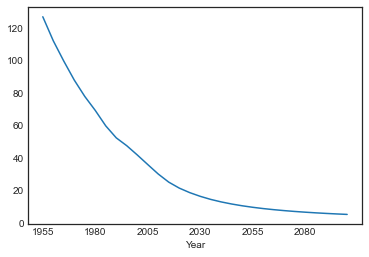

In [13]:
# Global infant mortality to 2080
infant_mortality.groupby('Year')['Infant Mortality Rate'].mean().plot(kind='line')
plt.show()

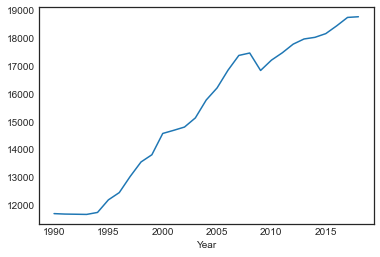

In [14]:
#Global GDP 
gdp.groupby('Year')['GDP Rate'].mean().plot(kind='line')
plt.show()

In [15]:
overlap_year = gdp_infant_mortality[(gdp_infant_mortality['Year'] >= '1989') & (gdp_infant_mortality['Year'] <= '2015')]
overlap_year

,Country,Year,GDP Rate,Year(s),Infant Mortality Rate,discardYear
0,Afghanistan,2015,1766.593077,2010-2015,60.100,2010
1,Afghanistan,2010,1671.581238,2005-2010,72.193,2005
2,Afghanistan,2005,1099.104568,2000-2005,84.647,2000
3,Albania,2015,10970.321401,2010-2015,9.212,2010
4,Albania,2010,9927.638204,2005-2010,16.781,2005
...,...,...,...,...,...,...
972,Zimbabwe,2010,1928.017081,2005-2010,62.686,2005
973,Zimbabwe,2005,1974.645081,2000-2005,65.008,2000
974,Zimbabwe,2000,2945.993212,1995-2000,68.980,1995
975,Zimbabwe,1995,2736.486436,1990-1995,61.844,1990


In [16]:
overlap_year.sort_values('Year', ascending=True)

,Country,Year,GDP Rate,Year(s),Infant Mortality Rate,discardYear
488,Lebanon,1990,5583.540689,1985-1990,30.407,1985
359,Guatemala,1990,5100.773488,1985-1990,68.097,1985
365,Guinea,1990,1342.988240,1985-1990,142.307,1985
371,Guinea-Bissau,1990,1633.612989,1985-1990,130.180,1985
377,Guyana,1990,2875.312775,1985-1990,49.835,1985
...,...,...,...,...,...,...
601,Myanmar,2015,5030.264149,2010-2015,43.662,2010
595,Mozambique,2015,1268.176324,2010-2015,62.782,2010
589,Morocco,2015,7324.986823,2010-2015,24.171,2010
615,Nepal,2015,2454.874607,2010-2015,33.781,2010


Text(0.5, 1.0, 'Relationship between GDP Rate and Infant Mortality Rate, all participating UN countries')

<Figure size 864x504 with 0 Axes>

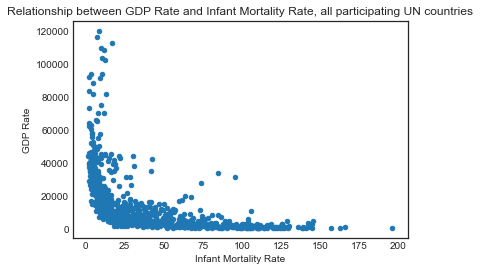

In [17]:
plt.figure(figsize = (12,7));
overlap_year.plot(kind = 'scatter', x = 'Infant Mortality Rate', y = 'GDP Rate')
plt.title("Relationship between GDP Rate and Infant Mortality Rate, all participating UN countries")

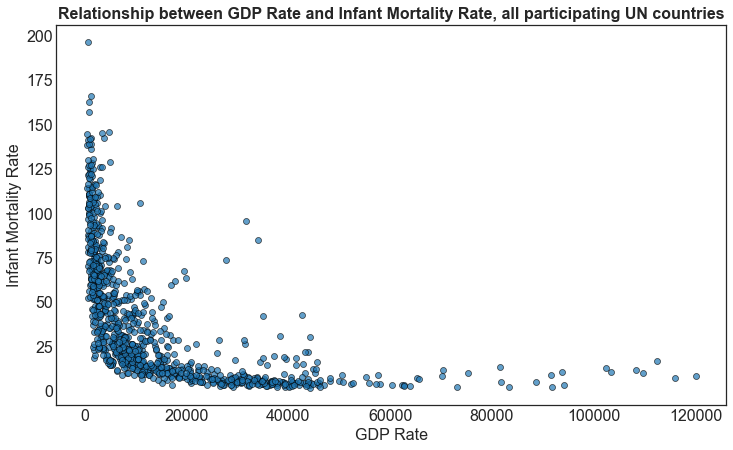

In [18]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = gdp_infant_mortality, x = 'GDP Rate', y = 'Infant Mortality Rate', 
                palette = ['orange', 'skyblue'],
                alpha = 0.7, edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('GDP Rate', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Infant Mortality Rate', fontsize = fontsize)
plt.title('Relationship between GDP Rate and Infant Mortality Rate, all participating UN countries', fontsize = fontsize, fontweight = 'bold');

In [19]:
overlap_year_mx = overlap_year[overlap_year['Country']=='Mexico']
overlap_year_mx

,Country,Year,GDP Rate,Year(s),Infant Mortality Rate,discardYear
567,Mexico,2015,17495.161114,2010-2015,15.162,2010
568,Mexico,2010,16160.341705,2005-2010,17.144,2005
569,Mexico,2005,16159.048914,2000-2005,20.120,2000
570,Mexico,2000,16129.960335,1995-2000,24.982,1995
571,Mexico,1995,13452.233847,1990-1995,33.083,1990
572,Mexico,1990,13579.611371,1985-1990,39.450,1985


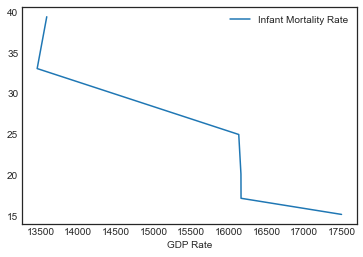

In [20]:
# A look at Mexico's relationship between GDP rate and Infant Mortality Rates:  It's not a straight-line correlation. 
overlap_year_mx.plot(kind = 'line', x = 'GDP Rate', y = 'Infant Mortality Rate')

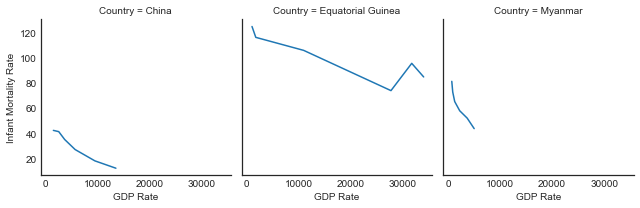

In [21]:
plt.figsize = (12,8)
overlap_year_top3gdp = overlap_year[overlap_year['Country'].isin(['Equatorial Guinea','Myanmar','China'])]
g = sns.FacetGrid(overlap_year_top3gdp, col = "Country" )
g.map_dataframe(sns.lineplot, "GDP Rate", "Infant Mortality Rate")
plt.show()

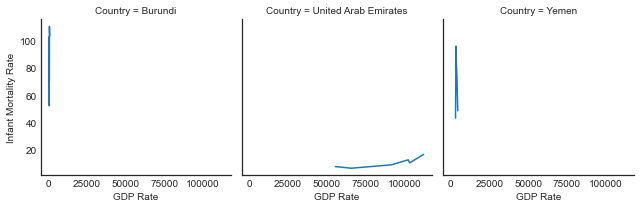

In [22]:
plt.figsize = (12,8)
overlap_year_top3gdp = overlap_year[overlap_year['Country'].isin(['United Arab Emirates','Burundi', 'Yemen'])]
g = sns.FacetGrid(overlap_year_top3gdp, col = "Country" )
g.map_dataframe(sns.lineplot, "GDP Rate", "Infant Mortality Rate")
plt.show()

In [23]:
infant_mortality_pivoted = infant_mortality.pivot_table(values = 'Infant Mortality Rate', index = 'Country', columns = 'Year')
infant_mortality_pivoted

Year,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,275.866,253.647,230.194,211.072,191.642,171.516,150.040,129.084,110.333,96.169,...,22.324,20.347,18.631,17.001,15.527,14.230,13.078,11.963,11.029,10.163
Africa,183.147,167.642,154.497,143.335,133.317,121.290,111.300,103.976,100.629,92.690,...,22.521,20.869,19.444,18.200,17.127,16.181,15.342,14.596,13.930,13.310
Albania,144.766,124.699,98.871,76.887,57.948,46.842,43.202,37.848,30.736,26.326,...,3.611,3.361,3.146,2.956,2.786,2.633,2.495,2.372,2.253,2.141
Algeria,163.011,153.452,142.815,132.287,122.194,105.459,75.347,55.363,43.036,37.831,...,8.052,7.136,6.359,5.716,5.168,4.711,4.327,3.973,3.649,3.360
Angola,192.800,187.543,180.652,172.001,162.331,154.582,148.744,145.394,145.056,142.138,...,24.908,22.506,20.490,18.872,17.503,16.365,15.440,14.596,13.863,13.197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,216.583,200.918,186.869,173.173,159.664,133.745,109.862,87.868,75.855,64.394,...,12.479,11.347,10.397,9.508,8.908,8.342,7.820,7.314,6.848,6.423
World,139.574,127.719,120.353,104.130,93.995,84.898,75.281,66.872,62.906,56.867,...,14.783,13.752,12.862,12.058,11.343,10.698,10.121,9.609,9.151,8.723
Yemen,287.972,281.048,270.842,239.851,198.468,159.017,121.011,96.132,83.541,74.879,...,21.887,20.139,18.515,17.072,15.752,14.563,13.464,12.412,11.468,10.666


In [24]:
infant_mortality_pivoted['Percent_Change'] = 100 * (infant_mortality_pivoted['2020'] - infant_mortality_pivoted['1990']) / infant_mortality_pivoted['1990']
infant_mortality_pivoted

Year,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,275.866,253.647,230.194,211.072,191.642,171.516,150.040,129.084,110.333,96.169,...,20.347,18.631,17.001,15.527,14.230,13.078,11.963,11.029,10.163,-59.943138
Africa,183.147,167.642,154.497,143.335,133.317,121.290,111.300,103.976,100.629,92.690,...,20.869,19.444,18.200,17.127,16.181,15.342,14.596,13.930,13.310,-54.359660
Albania,144.766,124.699,98.871,76.887,57.948,46.842,43.202,37.848,30.736,26.326,...,3.361,3.146,2.956,2.786,2.633,2.495,2.372,2.253,2.141,-78.794124
Algeria,163.011,153.452,142.815,132.287,122.194,105.459,75.347,55.363,43.036,37.831,...,7.136,6.359,5.716,5.168,4.711,4.327,3.973,3.649,3.360,-61.629608
Angola,192.800,187.543,180.652,172.001,162.331,154.582,148.744,145.394,145.056,142.138,...,22.506,20.490,18.872,17.503,16.365,15.440,14.596,13.863,13.197,-57.728655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,216.583,200.918,186.869,173.173,159.664,133.745,109.862,87.868,75.855,64.394,...,11.347,10.397,9.508,8.908,8.342,7.820,7.314,6.848,6.423,-67.250876
World,139.574,127.719,120.353,104.130,93.995,84.898,75.281,66.872,62.906,56.867,...,13.752,12.862,12.058,11.343,10.698,10.121,9.609,9.151,8.723,-56.250748
Yemen,287.972,281.048,270.842,239.851,198.468,159.017,121.011,96.132,83.541,74.879,...,20.139,18.515,17.072,15.752,14.563,13.464,12.412,11.468,10.666,-55.028502


In [25]:
#Countries with largest decline % change for infant mortality = Maldives, Estonia, Turkey
infant_mortality_pivoted.sort_values("Percent_Change")

Year,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Maldives,268.252,246.765,222.028,191.064,156.680,121.313,95.227,75.888,60.401,44.361,...,2.246,2.106,1.985,1.876,1.777,1.684,1.598,1.513,1.436,-91.081594
Estonia,85.285,49.641,33.406,23.521,21.093,21.854,20.274,18.239,16.336,11.971,...,0.880,0.828,0.781,0.740,0.700,0.663,0.629,0.596,0.566,-89.100280
Turkey,217.176,199.445,178.236,159.418,144.947,120.070,94.931,73.047,56.194,36.991,...,2.865,2.650,2.468,2.315,2.179,2.056,1.941,1.834,1.738,-87.811957
Montenegro,120.011,104.222,71.877,49.570,33.047,28.501,25.800,21.499,17.919,11.583,...,1.113,1.029,0.955,0.892,0.839,0.794,0.752,0.717,0.684,-87.162194
Republic of Korea,159.088,95.742,73.361,56.510,38.743,33.599,25.165,15.646,10.300,6.899,...,0.985,0.922,0.865,0.813,0.764,0.718,0.676,0.636,0.598,-86.539691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grenada,76.724,67.402,56.846,46.539,37.918,29.463,21.497,19.096,16.447,14.011,...,6.238,5.664,5.154,4.712,4.314,3.974,3.659,3.380,3.132,-21.507122
Eswatini,144.802,137.816,130.208,121.404,107.520,89.054,68.905,52.517,54.104,76.418,...,18.811,17.659,16.623,15.653,14.790,13.973,13.226,12.550,11.930,-21.250262
Botswana,127.894,112.482,98.661,85.438,71.450,56.398,43.514,36.316,41.816,56.427,...,12.643,11.444,10.410,9.536,8.713,7.986,7.365,6.811,6.305,-16.975989


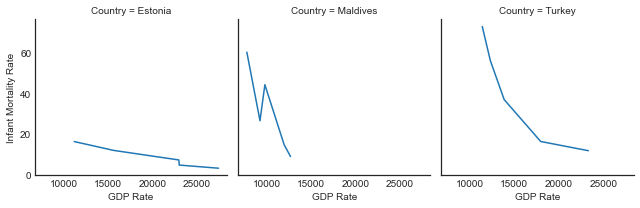

In [26]:
#Facet Grid for countries with largest decline in infant mortality
plt.figsize = (12,8)
overlap_year_top3gdp = overlap_year[overlap_year['Country'].isin(['Maldives','Estonia', 'Turkey'])]
g = sns.FacetGrid(overlap_year_top3gdp, col = "Country" )
g.map_dataframe(sns.lineplot, "GDP Rate", "Infant Mortality Rate")
plt.show()

In [27]:
from ipywidgets import interact

In [28]:
#Widget for countries with top 3 gdp increases and top 3 infant mortality decliners
@interact(x = overlap_year[overlap_year['Country'] == 'Maldives'])
def make_scatter(x):
    overlap_year.plot(kind = 'scatter', x = x, y = 'Infant Mortality Rate');

interactive(children=(Dropdown(description='x', options=('Country', 'Year', 'GDP Rate', 'Year(s)', 'Infant Mor…

In [29]:
# Note unable to do correlation coefficient between GDP Rate & Infant Mortality Rate??
overlap_year['GDP Rate'].corr(overlap_year['Infant Mortality Rate'])

-0.5544479306427496